In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
#reading data
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/clean_full_data_absma2g.csv')
df = df.drop(columns = ['RA', 'DEC', 'ID', 'ERR', 'M_g','M_r','M_z', 'M_u', 'Unnamed: 0','mu'])
df['ug'] = df.apply(lambda row: row.u_band - row.g_band,axis=1)
df['gr'] = df.apply(lambda row: row.g_band - row.r_band,axis=1)
df['ri'] = df.apply(lambda row: row.r_band - row.i_band,axis=1)
df['iz'] = df.apply(lambda row: row.i_band - row.z_band,axis=1)
df['zu'] = df.apply(lambda row: row.z_band - row.u_band,axis=1)
df.head()

,Mass_ground_truth,u_band,g_band,r_band,i_band,z_band,z,M_i,ug,gr,ri,iz,zu
0,8.973414,18.982250,18.900643,18.596375,18.584750,18.720857,1.1875,-25.451,0.081607,0.304268,0.011625,-0.136107,-0.261393
1,8.445230,20.822754,20.706984,20.583098,20.400262,20.097541,2.0993,-25.290,0.115770,0.123885,0.182836,0.302721,-0.725213
2,8.844659,21.185649,20.891439,20.409386,20.336351,20.082965,1.1103,-23.982,0.294211,0.482053,0.073035,0.253386,-1.102684
3,8.051990,20.238111,19.877519,19.916019,19.845519,19.731352,0.6794,-23.246,0.360593,-0.038500,0.070500,0.114167,-0.506759
4,9.409361,17.895957,17.664872,17.407213,17.446128,17.437894,1.0459,-26.482,0.231085,0.257660,-0.038915,0.008234,-0.458064


In [3]:
# defining feature and target numpy arrays
X = df.iloc[:, 6:].values
y = df.iloc[:,0].values

In [4]:
# # # train test split
# test_size = .01
# sc = StandardScaler()
# n_neighbors = 30
# while test_size < 1:
# #     seed = np.random.seed()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 1)
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
#     classifier = KNeighborsRegressor(n_neighbors = n_neighbors, weights = 'distance', p=3)
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)
#     rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#     r2 = metrics.r2_score(y_test, y_pred)
#     print(test_size,rmse,r2)
#     test_size += .01

In [5]:
seed = np.random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = seed)

In [6]:
# normalizing features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test.shape)
print(y_test.shape)

(1372, 7)
(1372,)


In [7]:
# KNN Regression Classifier
# # K value of 6 chosen from Pasquet 2018, Euclidean distance metric, uniform weights
n_neighbors = 30
classifier = KNeighborsRegressor(n_neighbors = n_neighbors, weights = 'distance', p=3)
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=3,
                    weights='distance')

In [8]:
# Fitting
y_pred = classifier.predict(X_test)

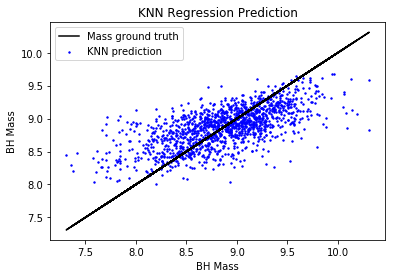

In [9]:
plt.plot(y_test, y_test, color = 'black', label = 'Mass ground truth')
plt.scatter(y_test, y_pred, color = 'blue', s=2, label = 'KNN prediction')
plt.xlabel('BH Mass')
plt.ylabel('BH Mass')
plt.legend()
plt.title('KNN Regression Prediction')
plt.show()

In [10]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.3610173930133708
r2 score: 0.41688079522155264


In [33]:
print(X_test)

[[-0.70325762 -0.04797356 -0.16318621 ... -1.2468173  -1.10062795
   0.38718993]
 [ 0.73876833 -1.50302693 -0.32197611 ... -0.34042273  0.99562745
   0.24687931]
 [ 0.87899034 -1.69340036  0.00838734 ... -0.6148538   0.61474263
   0.21129948]
 ...
 [-1.40741899  1.95055251 -0.36880835 ...  0.77812381  0.29949707
   0.41455581]
 [ 0.4396003  -0.18858132 -0.62846125 ...  0.4722281  -0.50500898
   0.66052341]
 [-0.09507413  0.28932709 -0.22693984 ...  0.78543732 -0.08679495
  -0.19330504]]


In [29]:
plt.scatter(X_test[:,0], y_pred, color = 'black', label = 'Mass ground truth')
plt.scatter(X_test[:,0], y_test[:,0] , color = 'blue', s=2, label = 'KNN prediction')
plt.xlabel('BH Mass')
plt.ylabel('BH Mass')
plt.legend()
plt.title('KNN Regression Prediction')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [613]:
# including color, ugriz bands, redshift, M_i : RMSE ~ .368, .378, .369, .378  (consistently .37)
# including ugriz bands, redshift, M_i : RMSE ~ .383, .368, .372, .387
# including color, redshift, M_i : RMSE ~ .392, .364, .354, .364
# color helps a lot.  color vs color + ugriz bands perform about the same, color only slightly better